In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## A Real Dataset 

In practice, deep learning tends to involve massive datasets (often terabytes or more in size), and models can take days, weeks, or even months to train. This is why, so far, we’ve used programmatically-generated datasets to keep things manageable and fast, while we learn the math and other aspects of deep learning. The main objective of this book is to teach how neural networks work, rather than the application of deep learning to various problems. That said, we’ll explore a more realistic dataset now, since this will present new challenges to deep learning that we’ve not yet had to consider. If you have explored deep learning before reading this book, you have likely become acquainted (and possibly annoyed) with the MNIST dataset, which is a dataset of images of handwritten digits (0 through 9) at a resolution of 28x28 pixels. It’s a relatively small dataset and is reasonably easy for models to learn. This dataset became the “hello world” of deep learning, and it was once a benchmark of machine learning algorithms. The problem with this dataset is that it’s comically easy to get 99%+ accuracy on the MNIST dataset, and doesn’t provide much room for learning how various parameters impact learning. In 2017, however, a company called Zalando released a dataset called Fashion MNIST, which is a drop-in replacement for the regular MNIST dataset.

The Fashion MNIST dataset is a collection of 60,000 training samples and 10,000 testing samples of 28x28 images of 10 various clothing items like shoes, boots, shirts, bags, and more. We’ll see some examples shortly, but first, we need the actual data. Since the original dataset consists of binary files containing encoded (in a specific format) image data, for this book, we have prepared and are hosting a preprocessed dataset consisting of .png images instead. It is usually wise to use lossless compression for images since lossy compression, like JPEG, affects images by changing their data). These images are also grouped by labels and separated into training and testing groups. The samples are the images of articles of clothing, and the labels are the classifications. Here are the numeric labels and their respective descriptions:

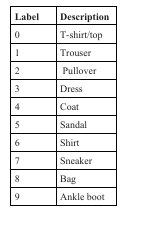

## Data preparation 

First, we will retrieve the data from the github site. Let’s define the URL of the dataset, a filename to save it locally to and the folder for the extracted images:


In [ ]:
import os 
import urllib 
import urllib.request
URL = 'fashion_mnist_images.zip' # Local zip file 
FILE = 'fashion_mnist_images.zip' 

FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE): 
    
    
    print(f'  Downloading {URL} and saving as {FILE}...') 
    urllib.request.urlretrieve(URL, FILE)

with ZipFile(FILE) as zip_images: 
    zip_images.extractall(FOLDER) 
print('Done!')

Running this:
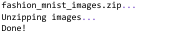

You should now have a directory called ​fashion_mnist_images,​ containing ​test​ and ​train directories and the data license. Inside of both the ​test​ and ​train​ directories, we have ten subdirectories, numbered 0 through 9. These numbers are classifications that correspond to the images within. For example, if we open directory ​0​, we can see these are images of shirts with either short sleeves or no sleeves at all. For example:

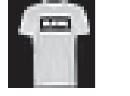
Figure 1:​ Example t-shirt

 Inside directory ​7​, we have non-boot shoes, or ​sneakers​ as the creators of this dataset have classified them. For example:
 
 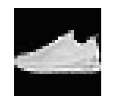
 
 Figure 2:​ Example sneaker image
 
 It’s common practice to grayscale (go from 3-channel RGB values per pixel to a single black to white range of 0-255 per pixel) images, though these images are already grayscaled. It is also a common practice to resize images to ​normalize​ their dimensions, but once again, the Fashion MNIST dataset is prepared so that all the images are already all the same shape (28x28).
 
 ## Data loading 
 
 Next, we have to read these images into Python and associate the image (pixel) data with the respective labels. We can access the directories as follows:
 
 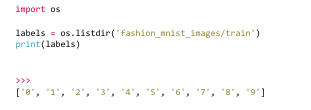
 
 Since the subdirectory names are the labels themselves, we can reference individual samples for each class by looking through the files in each numbered subdirectory:
 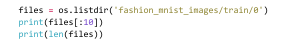
 
 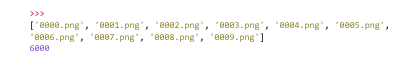
 
 
 As you can see, we have 6,000 samples of class 0. In total, we have 60,000 samples -- 6,000 per classification. Meaning our dataset is also already ​balanced​; each class occurs with the same frequency. If a dataset is not already balanced, the neural network will likely become biased to predict the class containing the most images. This is because neural networks fundamentally seek out the steepest and quickest gradient descent to decrease loss, which might lead to a local minimum making the model unable to find the global loss minimum. We have a total of 10 classes here, so a random prediction, with a balanced dataset, would have an accuracy of about 10%. Imagine, however, if the balance of classes in the dataset was 64% for class 0 and 4% for 1 through 9. The neural network might very quickly learn to always predict class 0. Though the model would rapidly decrease loss initially, it would likely remain stuck predicting class 0 with an accuracy closer to 64%. In such a case, we’re better off trimming away samples from the high-frequency classes so that we have the same number of samples per class. Another option is to use class weights, weighting classes that occur more often with a fraction of 1 when accounting for loss. Though we have never seen this work well in practice. With image data, another option would be to augment the samples through actions like cropping, rotation, and maybe flipping horizontally or vertically. Before applying such transformations, ensure they will generate valid samples that fit your objectives. Luckily for us, we don’t need to worry about that since the Fashion MNIST data are indeed perfectly balanced. We’ll now explore our data by looking at individual samples. To handle image data, we’re going to make use of the Python package containing OpenCV, under the ​cv2​ library, which you can install with pip:
 
 And to load the image data:
 
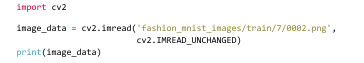
 
 We read in images with ​cv2.imread()​, where the first parameter is the path to the image. The cv2.IMREAD_UNCHANGED​ argument notifies the ​cv2​ package that we intend to read in these images in the same format as they were saved (grayscale in this case). By default, OpenCV will convert these images to use all 3 color channels, even though this is a grayscale image. As a result, we have a 2D array of numbers — grayscale pixel values. If we formatted this otherwise
 
 messy array before printing with the following line of the code, which will inform NumPy, since the loaded image is a NumPy array object, to print more characters in a line:
 
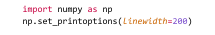

We’d still likely be able to identify the subject:

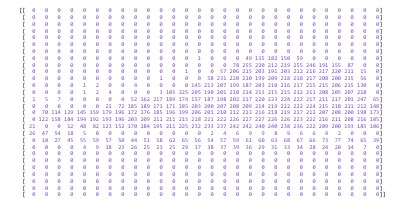

In this case, it’s a sneaker. Rather than formatting the raw values to see what we’re looking at this way, we can use Matplotlib to visualize this. For example:

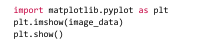

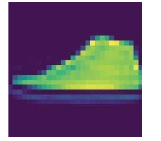

Figure 3:​ Sneaker image
We can check another sample:

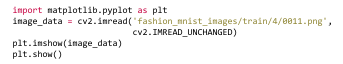

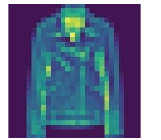


Figure 4:​ Jacket image 
 
 It looks like a jacket. If we check our table from before, class 4 is “coat.” You might wonder about the strange coloring, but this is just the default from matplotlib not expecting grayscale. We can notify Matplotlib that this is grayscale by specifying a ​cmap​ (colormap) during the plt.imshow()​ call:
 
 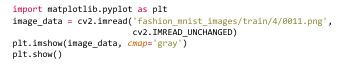
 
 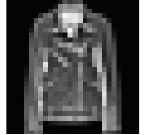
 Figure 5:​ Grayscaled jacket image
 
 
 Now we can iterate over all of the samples, load them, and put them into the input data (​X​) and targets (​y​) lists. First, we scan the train folder, which, as noted before, contains folders named from 0 to 9, which also act as sample labels. We iterate through these folders and the images inside them, appending them to a list variable (named ​X​)​ along with their respective labels to another list variable (named ​y​)​, forming our samples and ground-truth, or target labels:
 
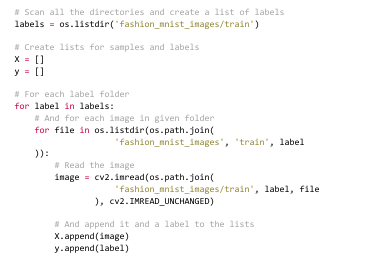

We need to do this operation on both the testing and training data. Again, they are already nicely split up for us. Many times, you will need to separate your data into train and test groups on your own. We’ll convert the above code into a function to prevent duplicating the code for training and testing directories. This function will take a dataset type as a parameter: train or test, along with the path where those datasets are located:
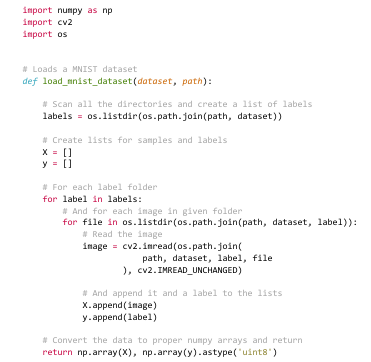

Since ​X​ has been defined as a list, and we are adding images represented as NumPy arrays to this list, we’ll call ​np.array()​ on ​X​ at the end to transform it from a list into a proper NumPy array. We will do the same with the labels (​y​) since they are a list of numbers and additionally inform NumPy that our labels are integer (not float) values. Then we can write a function that will create and return our train and test data:


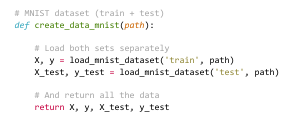


 Code up to this point for our new data:
 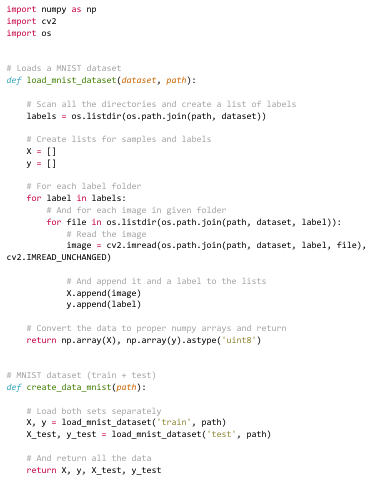
 
 Thanks to this function, we can load in our data by doing: # Create dataset
 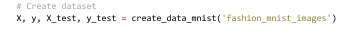
 
 
 
 

## Data preprocessing 

Next, we will ​scale​ the data (not the images, but the data representing them, the numbers). Neural networks tend to work best with data in the range of either 0 to 1 or -1 to 1. Here, the image data are within the range 0 to 255. We have a decision to make with ​how​ to scale these data. Usually, this process will be some experimentation and trial and error. For example, we could scale images to be between the range of -1 and 1 by taking each pixel value, subtracting half the maximum of all pixel values (i.e., 255/2 = 127.5), then dividing by this same half to produce a range bounded by -1 and 1. We could also scale our data between 0 and 1 by simply dividing it by 255 (the maximum value). To start, we opt to scale between -1 and 1. Before we do that, we have to change the datatype of the NumPy array, which is currently ​uint8​ (unsigned integer, holds integer values in the range of 0 to 255). If we don’t do this, NumPy will convert it to a float64​ data type while our intention is to use ​float32​, a 32-bit float value. This can be achieved by calling ​.astype(np.float32)​ on a NumPy array object. We will leave the labels untouched:

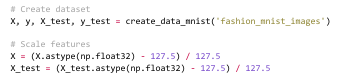

Ensure that you scale both training and testing data using identical methods. Later, when making predictions, you will also need to scale the input data for inference. It can be easy to forget to scale your data in these different places. You also want to be sure that any preprocessing, like scaling, is informed only by your training dataset. In this example, we knew the minimum (min) and maximum (max) values would be 0 and 255, and performed linear scaling. You will often need to first query your dataset for min and max values for use in scaling. You may also use other methods to scale if your dataset has extreme outliers, as min/max may not work well. If this is the case, you might use some combination of the average value and standard deviation to create your scaling method. A common mistake when scaling is to allow the testing dataset to inform transformations made to the training dataset. There is only one exception to this rule, which is when the data is being scaled linearly, for example, by the mentioned division by a constant number. Any non-linear scaling function could possibly leak information from testing or validation data into training data. Any preprocessing rules should be derived without knowledge of the testing dataset, but
then applied to the testing set. For example, your entire dataset might have a min value of 0 and a max of 125, while the training dataset only has a min of 0 and a max of 100. You will still use the 100 value when scaling your testing dataset. This means that your testing dataset might not fit neatly between the bounds of -1 and 1 after scaling, but this usually should not be a problem. In the case of a bigger difference, you can additionally scale the data linearly by dividing them by some number.

Back to our data, let’s check that our data have been scaled:

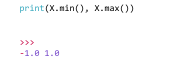

Next, we check the shape of our input data:

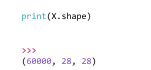

Our Dense layers work on batches of 1-dimensional vectors. They cannot operate on images shaped as a 28x28, 2-dimensional array. We need to take these 28x28 images and ​flatten​ them, which means to take every row of an image array and append it to the first row of that array, transforming the 2-dimensional (2D) array of an image into a 1-dimensional (1D) array (i.e., vector), or in other words, we could see this as unwrapping numbers in a 2D array to a list-like form. There are neural network models called convolutional neural networks that will allow you to pass 2D image data “as is,” but a dense neural network like we have here expects samples that are 1D. Even in convolutional neural networks, you will usually need to flatten data before feeding them to an output layer or a dense layer. To flatten an array with NumPy, we can reshape using ​-​1​ as a first shape dimension, which means “however many elements are there” and effectively put them all in the first dimension making a flat 1D array. For an example of this concept:

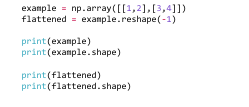

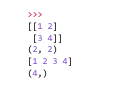

We could also use ​np.flatten()​, but our intention differs with a batch of samples. In the case of our samples, we still wish to retain all 60,000 of them, so we’d like to reshape our training data to be ​(​60000​, ​-​1​)​. This will notify NumPy that we wish to keep the 60,000 samples (first dimension), but flatten the rest (-1 as the second dimension means that we want to put all of the sample data in this single dimension into a 1D array). This will create 60,000 samples of 784 features each. The 784 features are the result of 28·28. To do this, we’ll use the number of samples from the training (​X.shape[​0​]​) and testing (​X_test.shape[​0​]​) datasets respectively and reshape them:

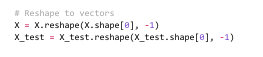

You can achieve the same result by explicitly defining the shape, instead of relying on NumPy inference:

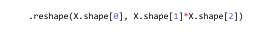
which would be more explicit, but we find this to be less legible.





## Data Shuffling 

Our dataset currently consists of samples and their target classifications, in order, from 0 to 9. To illustrate, we can query our ​y​ data at various points. The first 6000 will all be 0. For instance:

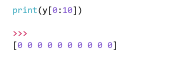

If we then query a bit later:
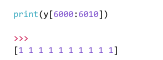

This is a problem if we train our network with data in this order; for the same reason, an imbalanced dataset is problematic. While we train on the first 6,000 samples, the model will learn that the quickest way to reduce loss is to always predict a 0, since it’ll see several batches of the data with class 0 only. Then, between 6,000 and 12,000, the loss will initially spike as the label will change and the model will be predicting, incorrectly, still label 0, and will likely learn that now it needs to always predict class 1 (as that’s all it sees in batches of labels which we optimize for). The model will cycle local minimums following whichever label is currently being repeated over batches and will most likely never find a global minimum. This process will continue until we get through all samples, repeating however many epochs we selected. Preferably, there would be many classifications (ideally some from each class) of samples per fitment to keep the model from becoming biased towards any single class, simply because that’s the class it’s been seeing lately. Thus, we often will randomly shuffle the data. We didn’t need to shuffle our previous training data, like the spiral data, since we were training on the entire dataset at once anyway, rather than individual batches. With this larger dataset that we’re training on in batches, we want to shuffle the data, as it’s currently organized in order of chunks

of 6,000 samples per label. When shuffling, we want to ensure that we shuffle the sample and target arrays the same; otherwise, we’ll have a very confused (and very wrong, in most cases) model as labels will no longer match samples. Hence, we cannot simply call ​shuffle()​ on both of them separately. There are many ways to achieve this, but what we’ll do is gather all of the “keys,” which are the same for samples and targets, and then shuffle them. These keys will be values from 0 to 59999 in this case.

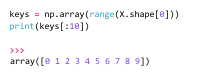

Then, we can shuffle these keys:

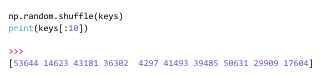
Now, this is essentially the new order of indexes, which we can then apply by doing:


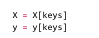
This tells NumPy to return values of given indices as we would normally index NumPy arrays, but we’re using a variable that keeps a list of randomly ordered indices. Then we can check a slice of targets:
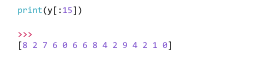

They seem to be shuffled. We can check individual samples as well:

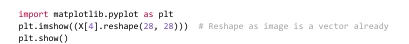

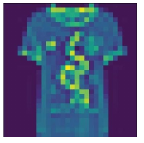


Figure 6:​ Random (shirt) image after shuffling

We can then check the class at the same index:
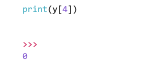
Class 0 is indeed “shirt,” and so these data do look properly shuffled. You may check a few more manually to ensure your data are as expected. If the model does not train or appears to be misbehaving, you will want to double-check how you preprocessed the data.





## Batches 

So far, we’ve trained our models by feeding the entire dataset as a single “batch” through the model. We discussed earlier in Chapter 2 why it is preferred to do more than 1 sample at a time, but is there a batch size that would be too big? Our dataset has been small enough for us to get away with the behavior of feeding the entire dataset at once, but real-world datasets can often be terabytes or more in size, which is a nonstarter for the majority of computers to process as a single batch. A batch is a slice of a fixed size from the data. When we train with batches, we iterate through the dataset in a chunk, or “batch, ” of data at a time, performing a forward pass, loss calculation, backward pass, and optimization. If the data have been shuffled, and each batch is large enough and somewhat representative of the dataset, it is a fair assumption that each gradient of each batch should be a good approximation of the direction towards a global minimum. If the batch is too small, the direction of the gradient descent can fluctuate too much from batch to batch, causing the model to take a long time to train. Common batch sizes range between 32 and 128 samples. You can go smaller if you’re having trouble fitting everything into memory, or larger if you want training to go faster, but this range is the typical range of batch sizes. You will usually see accuracy and loss improvements by increasing the batch size from say 2 to 8, or 8 to 32. At some point, however, you will see diminishing returns regarding accuracy and loss if you keep increasing the batch size. Additionally, training with large batch sizes will become slow compared to the speed achievable with smaller batch sizes — like our examples earlier with the spiral data, requiring 10 thousand epochs to train! As is often the case with neural networks, it’s a lot of trial and error with your specific data and model. For example, imagine we select a batch size of 128, and we opt to do 10 epochs. This means, for each epoch, we will iterate over our data, fitting 128 samples at a time to train our model. Each batch of samples being trained is referred to as a ​step​. We can calculate the number of ​steps​ by dividing the number of samples by the batch size:


We use the integer division operator, ​//​, (instead of the floating-point division operator, ​/​) to return an integer, as the number of steps cannot contain a fraction. This is the number of iterations that we’ll be making per epoch in a loop. If there are some straggler samples left over, we can add them in by simply adding one more step:

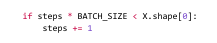

Why we add this 1 can be presented in a simple example:

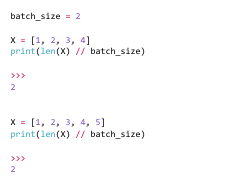

Integer division rounds down; thus, if there are any samples left, we’ll add 1 to form the last batch with the remainder. An example of code leading up to training a model using batches:
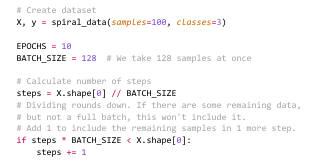


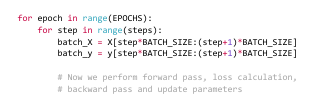

We loaded the dataset, defined the number of epochs and a batch size, then calculated the number of steps. Next, we have two loops — an outer one over the epochs and an inner one over the steps. During each step in each epoch, we’re selecting a slice of the training data. Now that we know how to train the model in batches, we’re interested in the training loss and accuracy for each step and epoch. So far, we’ve only been calculating loss per fit, but recall that we fitted against the entire dataset at once. Now, we’ll be interested in both batch-wise statistics and epoch-wise. For the overall loss and accuracy, we want to calculate a sample-wise average. To do this, we will accumulate the sum of losses from all epoch batches and counts to calculate the mean value at the end of each epoch. We’ll start in the common ​Loss​ class’ ​calculate​ method by adding:
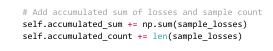

Making the full ​calculate​ method in the ​Loss​ class:
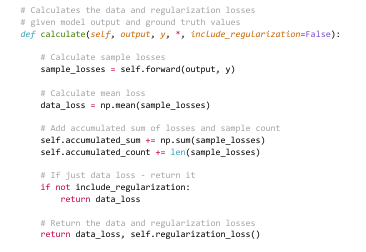

We’re saving the sum and the count so we can calculate the mean at any point. To do that, we’ll add a new method called ​calculate_accumulated​ inside the ​Loss​ class:

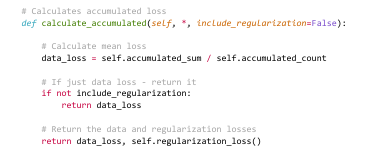

This method can also return the regularization loss if ​include_regularization​ is set to True​. The regularization loss does not need to be accumulated as it’s calculated from the current state of layer parameters, at the time it’s called. We’ll be using this ability during training, but not while evaluating and predicting; we’ll discuss this in more detail shortly.

Finally, in order to reset the sum and count values for a new epoch, we’ll add one last method:

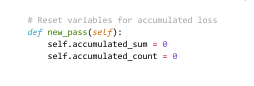
Making our full common ​Loss​ class:

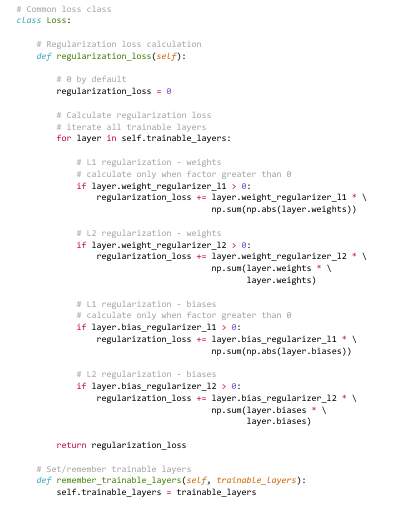

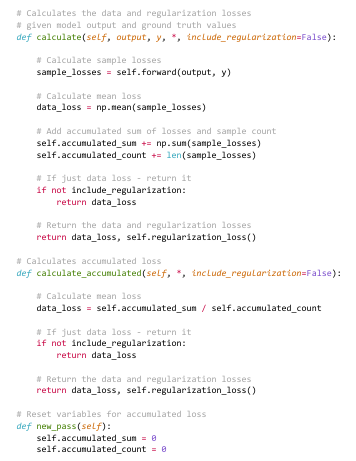

We’ll want to implement the same things for the ​Accuracy​ class now:

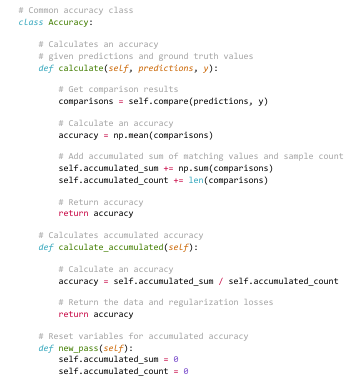

Here, we’ve added setting the ​accumulated_sum​ and ​accumulated_count​ properties in the calculate​ method for the epoch accuracy calculation, added a new calculate_accumulated​ method that returns this accuracy, and finally added a ​new_pass method to reset the ​accumulated_sum​ and ​accumulated_count​ values that we’ll use at the beginning of each epoch. Now, we’ll modify the ​train​ method for our ​Model​ class. First, we’ll add a new parameter called ​batch_size​:

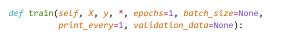
We’ll default this parameter to ​None​, which means to use the entire dataset as the batch. In this case, training will take 1 step per epoch, where that step consists of feeding all the data through the network at once.

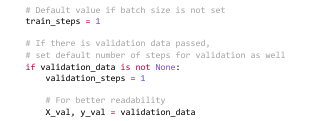
As discussed, most “real life” datasets will require a batch size smaller than that of all samples. We’ll handle that using the method that we described earlier: performing integer division of the number of all samples by the batch size and eventually adding 1 to include any remaining samples that did not form a full batch (we’ll do that for both training and validation data):

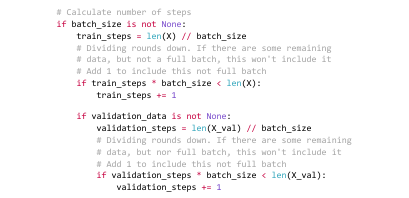

Next, starting at the top, we’ll modify the loop over epochs to print an epoch number and then reset the accumulated epoch loss and accuracy values. Then, inside of here, we’ll add a new loop that will iterate over steps in the epoch.

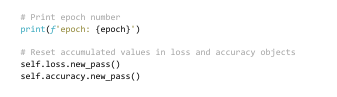
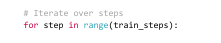

Inside of each step, we’ll need to grab the ​batch​ of data that we’ll use to train — either the full dataset if the ​batch_size​ parameter is still the default ​None​ or a slice of size ​batch_size​:

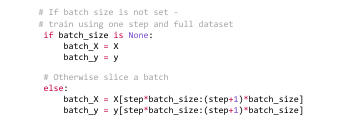

With each of these batches, we fit and print information, similar to how we were fitting per epoch. The difference now is we use ​batch_X​ instead of ​X​ and ​batch_y​ instead of ​y​. The other change is the ​if​ statement for the summary printing that will account for steps instead of epochs:

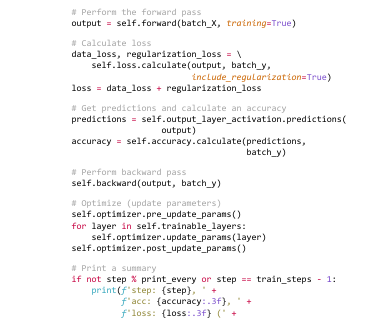

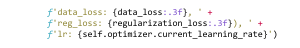

Then we’d like to print information like accuracy and loss per epoch:

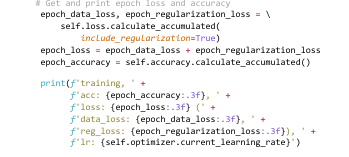

If the batch size is set, the chances are that our validation data will be larger than this batch size, so we need to add batching for the validation data as well:

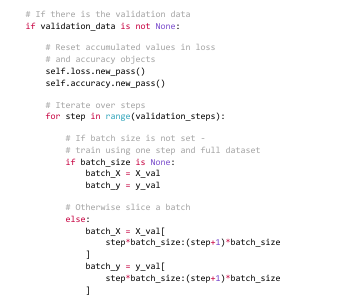

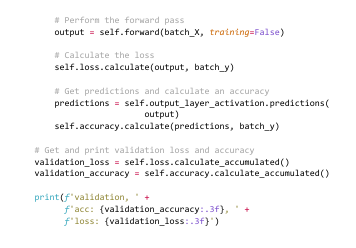

Compared to our current codebase, we’ve added calls to the ​new_pass​ method, of both loss and accuracy objects, which reset values accumulated during the training step. Next, we introduced batches (a loop iterating over steps), and removed catching a return from the loss calculation (we don’t care about batch loss during validation, just the final, overall loss). The last steps were to add handling for the overall validation loss and replace ​X_val​ with ​batch_X​ and ​y_val​ to batch_y​ to match the changes made to the training code. This makes our full ​train​ method for the ​Model​ class:
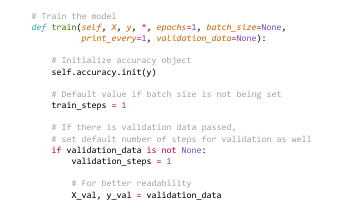

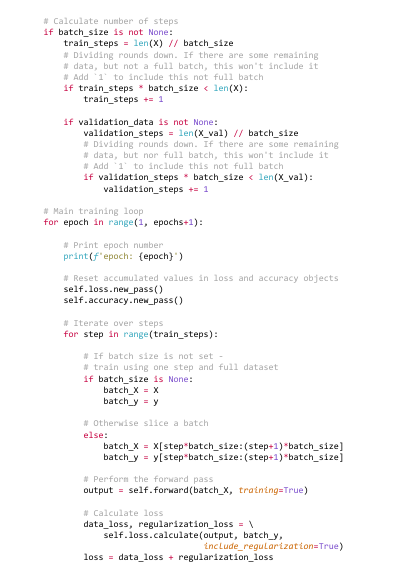

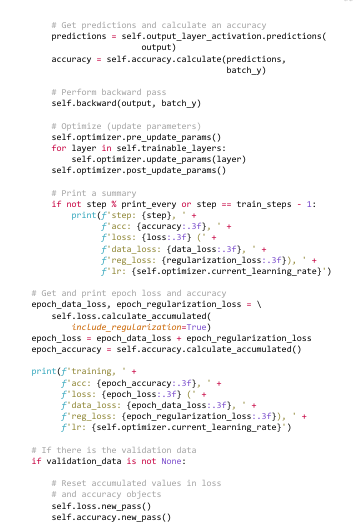
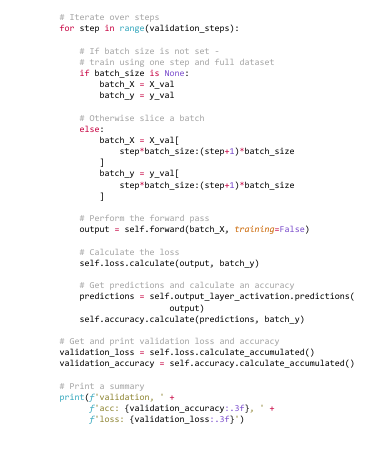












## Training 

At this point, we’re ready to train using batches and our new dataset. As a reminder, we create the data with:
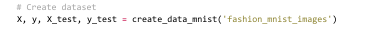

Then shuffle with:
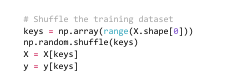

Then flatten sample-wise and scale to the range of -1 to 1:

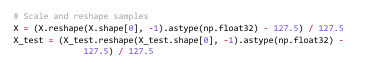

Then construct our model consisting of 2 hidden layers using ReLU activation, an output layer with softmax activation since we’re building a classification model, cross-entropy loss, Adam optimizer, and categorical accuracy:
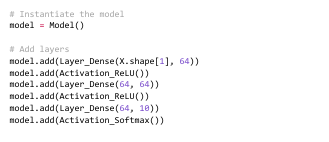

Set loss, optimizer and accuracy objects:

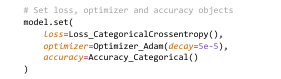

Finally, we finalize and train!


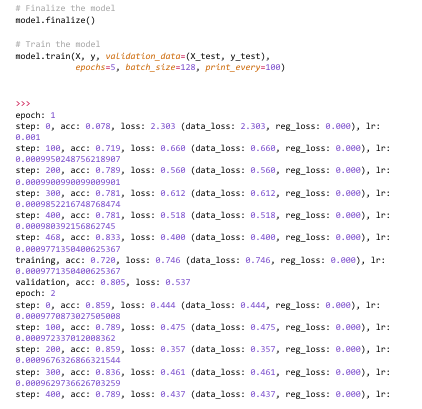

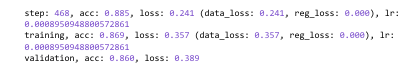
The model trained successfully and achieved pretty good accuracy. This was done with a new, real, much more challenging dataset and in just 5 epochs instead of 10000. Training also went faster than with our previous attempts at spiral data, where we trained by fitting the whole dataset at once. So far, we’ve only mentioned how important it is to shuffle the training data and what might happen if we attempt to train on non-shuffled data. Now would be a good time to exemplify what happens when we don’t shuffle it. We can comment out the shuffling code:


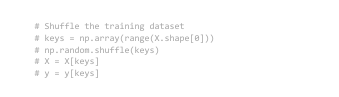

Running again, we can see that we end on:

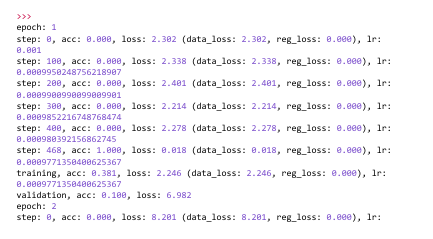

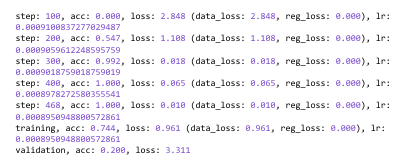

As we can see, this doesn’t work well at all. We can observe how the model approached a perfect accuracy of 1 during training, but epoch accuracy remained poor, and the validation accuracy proved that the model did not learn. Training accuracy quickly became high, since the model learned to predict just one label (as it repeatedly saw only that label). Once the label changed in the training data, the model quickly learned to predict only that new label, as that’s all it saw in every batch. This process repeated to the end of an epoch and then over all epochs. Epoch accuracy is lower because it took a while for the model to learn the new label after a switch, and it showed a low accuracy during this period. Validation accuracy was calculated after training for a given epoch ended, and as we remember, the model learned to predict just one label. In the case of validation, the label that the model predicted was the last label it had seen — its accuracy was close to 1/10 as our training dataset consists of 10 classes.
Re-enable shuffling, and then you can tinker around with your model to see if you can further improve results. Here is an example with a larger model, a higher learning rate decay, and twice as many epochs:

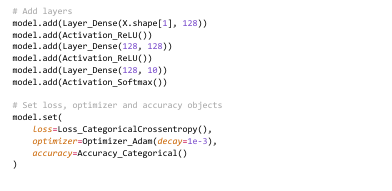
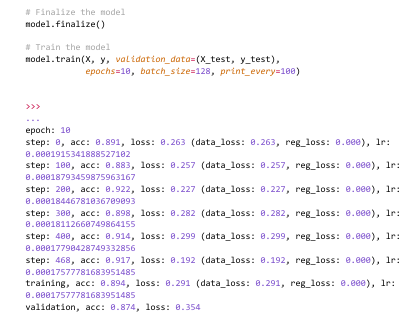

We improved accuracy and decreased loss a bit by simply increasing the model size, decay, and number of epochs.






In [6]:
import numpy as np
import os
import cv2

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs, training):
        # Save input values
        self.inputs = inputs

        # If not in the training mode - return values
        if not training:
            self.output = inputs.copy()
            return

        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask


    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask


# Input "layer"
class Layer_Input:

    # Forward pass
    def forward(self, inputs, training):
        self.output = inputs


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)


# Sigmoid activation
class Activation_Sigmoid:

    # Forward pass
    def forward(self, inputs, training):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return (outputs > 0.5) * 1


# Linear activation
class Activation_Linear:

    # Forward pass
    def forward(self, inputs, training):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs


# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)

                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon


    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# RMSprop optimizer
class Optimizer_RMSprop:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho


    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
            (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
            (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2


    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)

        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:

    # Regularization loss calculation
    def regularization_loss(self):

        # 0 by default
        regularization_loss = 0

        # Calculate regularization loss
        # iterate all trainable layers
        for layer in self.trainable_layers:

            # L1 regularization - weights
            # calculate only when factor greater than 0
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * \
                                       np.sum(np.abs(layer.weights))

            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * \
                                       np.sum(layer.weights * \
                                              layer.weights)

            # L1 regularization - biases
            # calculate only when factor greater than 0
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * \
                                       np.sum(np.abs(layer.biases))

            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * \
                                       np.sum(layer.biases * \
                                              layer.biases)

        return regularization_loss


    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y, *, include_regularization=False):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Add accumulated sum of losses and sample count
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Calculates accumulated loss
    def calculate_accumulated(self, *, include_regularization=False):

        # Calculate mean loss
        data_loss = self.accumulated_sum / self.accumulated_count

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Reset variables for accumulated loss
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0



# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):  # L1 loss

    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)

        # Return losses
        return sample_losses


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Common accuracy class
class Accuracy:

    # Calculates an accuracy
    # given predictions and ground truth values
    def calculate(self, predictions, y):

        # Get comparison results
        comparisons = self.compare(predictions, y)

        # Calculate an accuracy
        accuracy = np.mean(comparisons)

        # Add accumulated sum of matching values and sample count
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)

        # Return accuracy
        return accuracy

    # Calculates accumulated accuracy
    def calculate_accumulated(self):

        # Calculate an accuracy
        accuracy = self.accumulated_sum / self.accumulated_count

        # Return the data and regularization losses
        return accuracy

    # Reset variables for accumulated accuracy
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):

    def __init__(self, *, binary=False):
        # Binary mode?
        self.binary = binary

    # No initialization is needed
    def init(self, y):
        pass

    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y


# Accuracy calculation for regression model
class Accuracy_Regression(Accuracy):

    def __init__(self):
        # Create precision property
        self.precision = None

    # Calculates precision value
    # based on passed-in ground truth values
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision


# Model class
class Model:

    def __init__(self):
        # Create a list of network objects
        self.layers = []
        # Softmax classifier's output object
        self.softmax_classifier_output = None

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)


    # Set loss, optimizer and accuracy
    def set(self, *, loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy

    # Finalize the model
    def finalize(self):

        # Create and set the input layer
        self.input_layer = Layer_Input()

        # Count all the objects
        layer_count = len(self.layers)

        # Initialize a list containing trainable layers:
        self.trainable_layers = []

        # Iterate the objects
        for i in range(layer_count):

            # If it's the first layer,
            # the previous layer object is the input layer
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]

            # All layers except for the first and the last
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]

            # The last layer - the next object is the loss
            # Also let's save aside the reference to the last object
            # whose output is the model's output
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]

            # If layer contains an attribute called "weights",
            # it's a trainable layer -
            # add it to the list of trainable layers
            # We don't need to check for biases -
            # checking for weights is enough
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])


        # Update loss object with trainable layers
        self.loss.remember_trainable_layers(
            self.trainable_layers
        )

        # If output activation is Softmax and
        # loss function is Categorical Cross-Entropy
        # create an object of combined activation
        # and loss function containing
        # faster gradient calculation
        if isinstance(self.layers[-1], Activation_Softmax) and \
           isinstance(self.loss, Loss_CategoricalCrossentropy):
            # Create an object of combined activation
            # and loss functions
            self.softmax_classifier_output = \
                Activation_Softmax_Loss_CategoricalCrossentropy()

    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None,
              print_every=1, validation_data=None):

        # Initialize accuracy object
        self.accuracy.init(y)

        # Default value if batch size is not being set
        train_steps = 1

        # If there is validation data passed,
        # set default number of steps for validation as well
        if validation_data is not None:
            validation_steps = 1

            # For better readability
            X_val, y_val = validation_data

        # Calculate number of steps
        if batch_size is not None:
            train_steps = len(X) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if train_steps * batch_size < len(X):
                train_steps += 1

            if validation_data is not None:
                validation_steps = len(X_val) // batch_size

                # Dividing rounds down. If there are some remaining
                # data but nor full batch, this won't include it
                # Add `1` to include this not full batch
                if validation_steps * batch_size < len(X_val):
                    validation_steps += 1

        # Main training loop
        for epoch in range(1, epochs+1):

            # Print epoch number
            print(f'epoch: {epoch}')

            # Reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()

            # Iterate over steps
            for step in range(train_steps):

                # If batch size is not set -
                # train using one step and full dataset
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                # Otherwise slice a batch
                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]

                # Perform the forward pass
                output = self.forward(batch_X, training=True)

                # Calculate loss
                data_loss, regularization_loss = \
                    self.loss.calculate(output, batch_y,
                                        include_regularization=True)
                loss = data_loss + regularization_loss

                # Get predictions and calculate an accuracy
                predictions = self.output_layer_activation.predictions(
                                  output)
                accuracy = self.accuracy.calculate(predictions,
                                                   batch_y)

                # Perform backward pass
                self.backward(output, batch_y)


                # Optimize (update parameters)
                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

                # Print a summary
                if not step % print_every or step == train_steps - 1:
                    print(f'step: {step}, ' +
                          f'acc: {accuracy:.3f}, ' +
                          f'loss: {loss:.3f} (' +
                          f'data_loss: {data_loss:.3f}, ' +
                          f'reg_loss: {regularization_loss:.3f}), ' +
                          f'lr: {self.optimizer.current_learning_rate}')

            # Get and print epoch loss and accuracy
            epoch_data_loss, epoch_regularization_loss = \
                self.loss.calculate_accumulated(
                    include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            print(f'training, ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f} (' +
                  f'data_loss: {epoch_data_loss:.3f}, ' +
                  f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                  f'lr: {self.optimizer.current_learning_rate}')

            # If there is the validation data
            if validation_data is not None:

                # Reset accumulated values in loss
                # and accuracy objects
                self.loss.new_pass()
                self.accuracy.new_pass()

                # Iterate over steps
                for step in range(validation_steps):

                    # If batch size is not set -
                    # train using one step and full dataset
                    if batch_size is None:
                        batch_X = X_val
                        batch_y = y_val


                    # Otherwise slice a batch
                    else:
                        batch_X = X_val[
                            step*batch_size:(step+1)*batch_size
                        ]
                        batch_y = y_val[
                            step*batch_size:(step+1)*batch_size
                        ]

                    # Perform the forward pass
                    output = self.forward(batch_X, training=False)

                    # Calculate the loss
                    self.loss.calculate(output, batch_y)

                    # Get predictions and calculate an accuracy
                    predictions = self.output_layer_activation.predictions(
                                      output)
                    self.accuracy.calculate(predictions, batch_y)

                # Get and print validation loss and accuracy
                validation_loss = self.loss.calculate_accumulated()
                validation_accuracy = self.accuracy.calculate_accumulated()

                # Print a summary
                print(f'validation, ' +
                      f'acc: {validation_accuracy:.3f}, ' +
                      f'loss: {validation_loss:.3f}')

    # Performs forward pass
    def forward(self, X, training):

        # Call forward method on the input layer
        # this will set the output property that
        # the first layer in "prev" object is expecting
        self.input_layer.forward(X, training)

        # Call forward method of every object in a chain
        # Pass output of the previous object as a parameter
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        # "layer" is now the last object from the list,
        # return its output
        return layer.output


    # Performs backward pass
    def backward(self, output, y):

        # If softmax classifier
        if self.softmax_classifier_output is not None:
            # First call backward method
            # on the combined activation/loss
            # this will set dinputs property
            self.softmax_classifier_output.backward(output, y)

            # Since we'll not call backward method of the last layer
            # which is Softmax activation
            # as we used combined activation/loss
            # object, let's set dinputs in this object
            self.layers[-1].dinputs = \
                self.softmax_classifier_output.dinputs

            # Call backward method going through
            # all the objects but last
            # in reversed order passing dinputs as a parameter
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        # First call backward method on the loss
        # this will set dinputs property that the last
        # layer will try to access shortly
        self.loss.backward(output, y)

        # Call backward method going through all the objects
        # in reversed order passing dinputs as a parameter
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)


# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):

    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []


    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(
                        os.path.join(path, dataset, label, file),
                        cv2.IMREAD_UNCHANGED)

            # And append it and a label to the lists
            X.append(image)
            y.append(label)

    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


# MNIST dataset (train + test)
def create_data_mnist(path):

    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)

    # And return all the data
    return X, y, X_test, y_test


# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) -
             127.5) / 127.5

# Instantiate the model
model = Model()


# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical()
)

# Finalize the model
model.finalize()

# Train the model
model.train(X, y, validation_data=(X_test, y_test),
            epochs=10, batch_size=128, print_every=100)


epoch: 1
step: 0, acc: 0.102, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.734, loss: 0.810 (data_loss: 0.810, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.758, loss: 0.700 (data_loss: 0.700, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.758, loss: 0.626 (data_loss: 0.626, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.812, loss: 0.531 (data_loss: 0.531, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.802, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.761, loss: 0.654 (data_loss: 0.654, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.810, loss: 0.511
epoch: 2
step: 0, acc: 0.758, loss: 0.587 (data_loss: 0.587, reg_loss: 0.000), lr: 0.0006807351940095304
step: 100, acc: 0.805, loss: 0.530 (data_loss: 0.530, reg_loss: 0.000), lr: 0.0006373486297004461
step: 200, acc: 0.789, loss: 0.508 (data_loss: 0.508, reg_loss: 0.000), lr: 0.000599161